# Outline

This research proposal will consist of the following:

[1. About the Dataset.](#1.-About-the-Dataset)

[2. Exploratory Data Analysis.](#2.-Exploratory-Data-Analysis)

- [2.1 Clean and Visualize Continuous Variables](#2.1.-Clean-and-Visualize-Continuous-Variables)
- [2.2 Clean and Visualize Categorical Variables](#2.2.-Clean-and-Visualize-Categorical-Variables)
- [2.3 Influence of Self Employment Status in Work Interference](#2.3.-Influence-of-Self-Employment-Status-in-Work-Interference)
- [2.4 Influence of Location in Work Interference](#2.4.-Influence-of-Location-in-Work-Interference)
- [2.5 Influence of Time in Work Interference](#2.5.-Influence-of-Time-in-Work-Interference)
- [2.6 Influence of Support in Work Interference](#2.6.-Influence-of-Support-in-Work-Interference)

[3. Experimental Design.](#3.-Experimental-Design)

- [3.1 Problem](#3.1.-Problem)
- [3.2 Solution](#3.2.-Solution)
- [3.3 Hypothesis](#3.3.-Hypothesis)
- [3.4 Sample Selection](#3.4.-Sample-Selection)
- [3.5 Treatment](#3.5.-Treatment)

[4. Rollout and Evaluation](#4.-Rollout-and-Evaluation)

- [4.1 Rollout Plan](#4.1.-Rollout-Plan)
- [4.2 Evaluation Plan](#4.2.-Evaluation-Plan)

# 1. About the Dataset

**OSMI Mental Health in Tech Survey 2016**

https://osmihelp.org/

Open Sourcing Mental Illness is a non-profit, 501(c)(3) corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities. 

This survey measures attitudes towards mental health in the tech workplace, and examines the frequency of mental health disorders among tech workers.

https://www.kaggle.com/osmi/mental-health-in-tech-survey

# 2. Exploratory Data Analysis

[Back to Ouline](#Outline)

In [2]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress annoying harmless error.
warnings.filterwarnings(action="ignore")
%matplotlib inline

In [3]:
data = pd.read_csv('../../../OneDrive/DataSets/mental-health-in-tech-survey/survey.csv')

In [4]:
# How many datapoints, how many variables?
data.shape

(1259, 27)

In [5]:
# What variables do we have?
pd.options.display.max_columns = 30
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
# Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

Everything seems very complete except for 'state', 'work_interfere' and 'comments'. We'll keep them because the dataset is very small as it is.

In [7]:
#data.drop('Timestamp',axis=1,inplace=True)
data.shape

(1259, 27)

## 2.1. Clean and Visualize Continuous Variables

[Back to Ouline](#Outline)

Age is our only continuous variable. Let's clean it and get a statistical summary.

count    1259.000000
mean       32.076251
std         7.265063
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64
median:  31.0


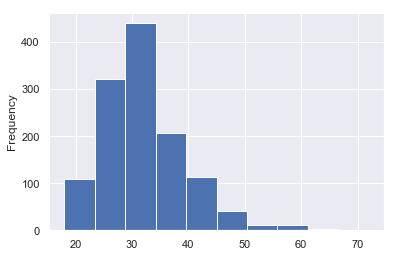

In [8]:
# Replace noise with the mean age.
data.Age[data.Age < 15] = 32
data.Age[data.Age > 100] = 32

# Get a statistical summary, median age and histogram.
print(data.Age.describe())
print('median: ', np.median(data.Age))

sns.set(style="darkgrid")
data.Age.plot(kind='hist')
plt.show()

**Takeaway:** Most people in this survey are in their early 30's and late 20's. 

Let's visualize the **distribution of 'Age', by the categories of 'work_interfere'**. 

But first, we should clean 'work_interfere'.

### 2.1.1. Clean 'work_interfere' Variable ##
This variable is the answer to the question: 'If you have a mental health issue, do you feel that it interferes with your work?' 

We could hypothesize that tech worker's job performance is less affected if they feel safe talking about mental health issues at work; or if their employers actually offer mental health services.

We can also assume that people who didn't respond do not have a mental health issue. Many values are missing in this variable. Perhaps it's best to keep them for now, and fill them up.

In [9]:
data.work_interfere.fillna(value='No Issue',inplace=True)
data.work_interfere.value_counts()

Sometimes    465
No Issue     264
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

### 2.1.2. Age Distribution by 'work_interfere' ##
Now that both variables are clean, let's go ahead and see what they can reveal.

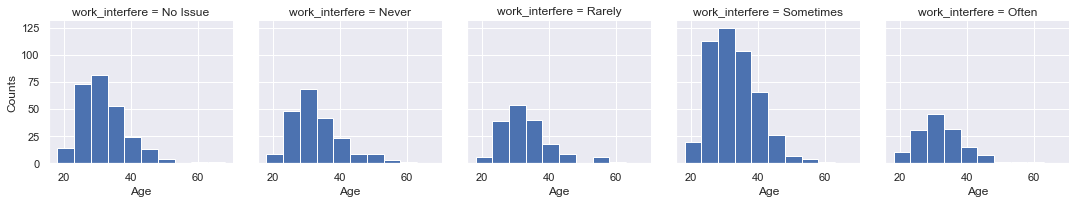

In [10]:
sns.set(style="darkgrid")

g = sns.FacetGrid(col='work_interfere', sharey=True,
                col_order=['No Issue','Never','Rarely','Sometimes','Often'],
                data=data,despine=True)

g = g.map(plt.hist, 'Age', bins=np.arange(18,72,5))

g = g.set_ylabels('Counts')

plt.show()

**Takeaway:** The majority of respondents with mental health issues said that they interfered 'sometimes' with their work. However, there are almost no differences in the age distributions between different 'work_interfere' categories. They all show signs of central tendency at around 32 years of age.

**Maybe 'Gender' could tell us more.** But first let's clean it.

## 2.2. Clean and Visualize Categorical Variables

[Back to Ouline](#Outline)

### 2.2.1. Clean 'Gender' Variable
Gender is a very important variable here because it's very possible that the effects of mental health vary by gender. We also don't have that much data so we **can't afford to drop the noisy values.** We'll try to do some cleaning.

In [11]:
# Let's get a view of all the unique gender raw values.
data.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Man                                                 2
Female (trans)                                      2
Cis Male                                            2
Malr                                                1
Trans woman                                         1
Nah                                                 1
Guy (-ish) ^_^              

**Takeaway:** There are many variations of 'male' and 'female', plus a few gender-non-conforming respondents. If we had sufficient data for statistical purposes I could create categories for several gender-non-conforming respondents, but unfortunately because of their scarcity it makes more sense to **re-code everything to the binary confines.**

In [12]:
# If it contains an 'f' or a 'w', then turn into 'F'
data.Gender[data.Gender.apply(lambda x: 'f' in str.lower(x))] = 'F'
data.Gender[data.Gender.apply(lambda x: 'w' in str.lower(x))] = 'F'

# Else, turn into 'M'
data.Gender[data.Gender != 'F'] = 'M'

In [13]:
# How many men and women do we have after cleaning?
data.Gender.value_counts()

M    1006
F     253
Name: Gender, dtype: int64

**Takeaway:** We have more men than women in this survey. But maybe that's a reflection of the tech industry anyway. That leads to another question: 

**How many of those men and women actually work in tech companies?**

So far we've cleaned 'Age' and 'Gender', and re-coded 'work_interfere'. Now we can explore how they all relate to each other, plus whether the respondents work in a 'tech_company'.

### 2.2.2. Visualizations between 'Gender', 'tech_company', 'work_interfere' and 'Age'
Gender could be compared with several other variables to better understand the sample. For example, 'tech_company' represents whether the respondent works in a tech company or not. Next we'll explore the importance of 'Gender' and 'tech_company' on 'work_interfere'. But first, let's count our data points.

**Counting Men and Women by 'tech_company'**

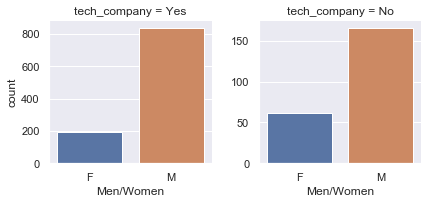

In [14]:
sns.set(style="darkgrid")

g = sns.catplot(col='tech_company', x='Gender', data=data, 
                kind='count', sharey=False, height=3)

g.set_axis_labels('Men/Women')

plt.show()

**Takeaway:** It's evident there's a lower ratio of women compared to men in the respondents who worked at tech companies. 

**Now, what relations exist between 'Gender', 'tech_company' and 'work_interfere'?**

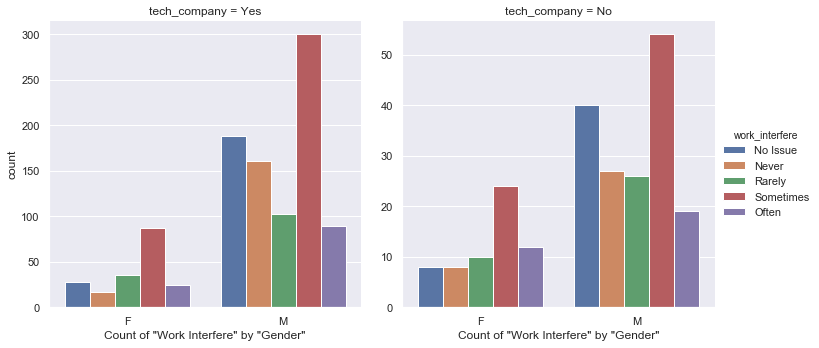

In [15]:
sns.set(style="darkgrid")

g = sns.catplot(hue='work_interfere', x='Gender', col='tech_company', kind='count', 
                data=data, hue_order=['No Issue','Never','Rarely','Sometimes','Often'],
               sharey=False)
g = g.set_axis_labels('Count of "Work Interfere" by "Gender"')
plt.show()

**Takeaway:** 'work_interfere' for men seems to stay equally distributed regardless of 'tech_company'. Women seem to be affected differently with 'tech_company', but the number of data points is too small to make serious conclusions. There's only about 60 women respondents who don't work at tech companies.

Let's now look at **men vs women's 'work_interfere' regardless of 'tech_company'**

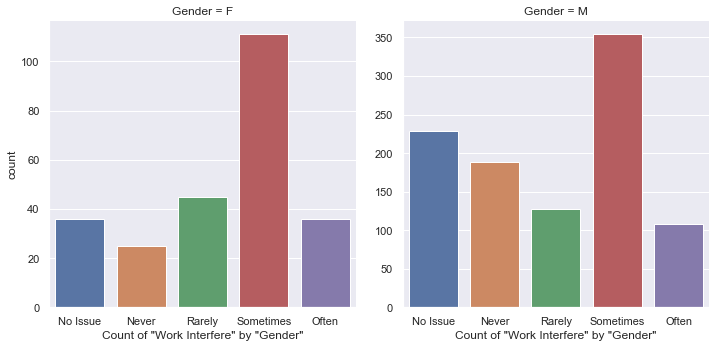

In [16]:
sns.set(style="darkgrid")
g = sns.catplot(x='work_interfere', col='Gender', kind='count', 
                data=data, order=['No Issue','Never','Rarely','Sometimes','Often'],
               sharey=False)
g = g.set_axis_labels('Count of "Work Interfere" by "Gender"')
plt.show()

**Takeaway:** Men and women appear equally likely to be 'Sometimes' affected at work by their mental health issue, but men appear more likely to have 'No Issue' at all or to 'Never' be affected by it.

Earlier in the analysis we plotted the distributions of 'Age' categorized by 'work_interfere' facets, and found that the distributions were similar. What if 'Gender' or 'tech_company' paint a different 'Age' picture?

**Age of Work-Interference by 'tech_company' and 'Gender'**

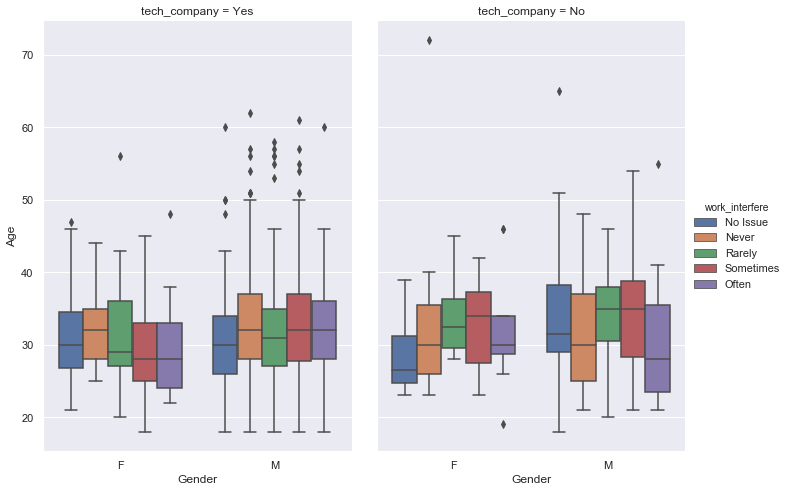

In [17]:
sns.set(style="darkgrid")

g = sns.catplot(kind='box', y='Age', col='tech_company', x='Gender',
                hue='work_interfere', data=data, 
                hue_order=['No Issue','Never','Rarely','Sometimes','Often'],
               height=7, aspect=0.7)


**Takeaway:** This is the most telling figure so far. It tells that women in tech companies are more likely to be affected at work by a mental health issue the younger they are. Men in tech on the contrary, are more likely to be affected the older they are.

And interestingly, men and women not in tech show the inverse pattern. Older women and younger men are more affected.

## 2.3. Influence of Self-Employment Status in Work Interference

[Back to Ouline](#Outline)

So far our premise is that in tech workers there is a different relation between age and degree of work interference for men and for women. The next thing to explore is the influence of self-employment status in this dynamic.

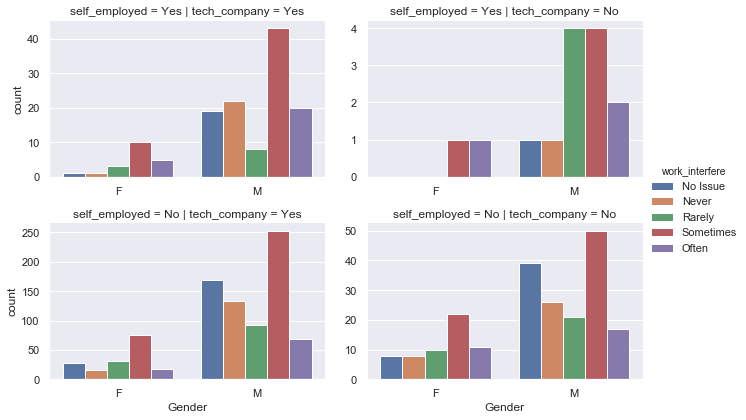

In [18]:
# Let's first inspect how many respondents are self-employed
g = sns.catplot(kind='count', col='tech_company', x='Gender',
                hue='work_interfere', data=data, row='self_employed',
                hue_order=['No Issue','Never','Rarely','Sometimes','Often'],
               height=3, aspect=1.5, sharey=False, sharex=False)

The top right facet is not trustworthy, the respondent counts are too low for both men and women entrepreneurs not in tech. However, we can compare the self-employed tech people (Top left) with the employe tech people (Lower left) in order to interpret the effects of being self-employed in tech. Also, the two lower facets allow us to compare tech and non-tech sectors.

**Takeaways:** 
1. **Self-Employed**. There's too few non-tech entrepreneur respondents for statistical analysis. But if we trusted the visuals, across the board being self employed increases the chance of mental issues and work interference.
2. **Tech Sector for Employees**. Being in a tech company doesn't influence work interference for men employees. Women employees seem slightly more mentally healthy if they are in the tech sector. 

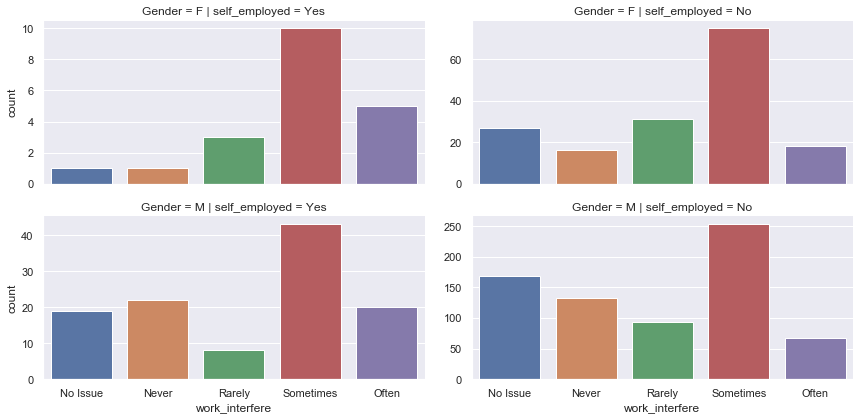

In [19]:
# Let's isolate the respondents who are in the tech sector for the purposes of this figure.
dfplot = data[data.tech_company == 'Yes']
g = sns.catplot(kind='count', col='self_employed', x='work_interfere', row='Gender',
                data=dfplot, order=['No Issue','Never','Rarely','Sometimes','Often'],
               height=3, aspect=2, sharey=False)

Here the first row is for women, the 2nd for men. The first column for self-employed, the second column for employees. This allows us to compare the effects of self-employed in the distribution of work-interfere, separately for men and women.

**Takeaway:** Men employees in tech are more likely to be mentally healthy or unaffected at work compared to entrepreneurs.

Women entrepreneurs have a very small count, but show the same behavior.

### 2.3.1. Age Distribution by Self-Employment Status

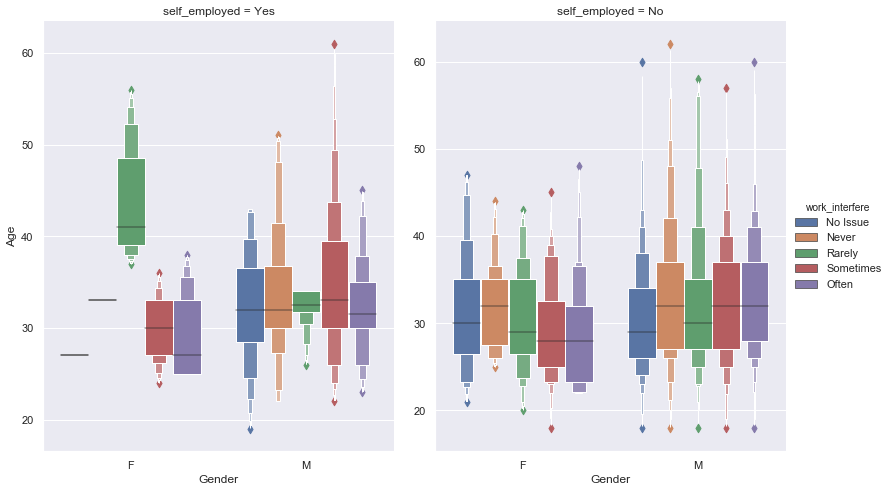

In [20]:
dfplot = data[data.tech_company == 'Yes']
g = sns.catplot(kind='boxen', y='Age',col='self_employed', x='Gender', hue='work_interfere',
                data=dfplot, hue_order=['No Issue','Never','Rarely','Sometimes','Often'],
               height=7, aspect=0.8, sharey=False)

**Takeaway:** Based on the figure above, being self-employed doesn't alter the central tendency of age for men and women in tech, divided by work-interference.

If anything, the **scarcity of data** for self-employed women in tech is causing a **big deviation** from the pattern seen on the right side. Perhaps with more data, these facets would look more similar. 

**Identifying Focus Groups:** Since we first analyzed the age distribution of work-interfere values for men and women, we observed that **men employees in tech struggle more as they age, whereas women employees in tech struggle more the younger they are.** ('Struggle' here refers to the work interference of mental health issues). Discarding the data for self-employed individuals, this pattern still holds true as can be seen on the right side.

## 2.4. Influence of Location in Work Interference

[Back to Ouline](#Outline)

### 2.4.1. Visualizing Work Interference by Country

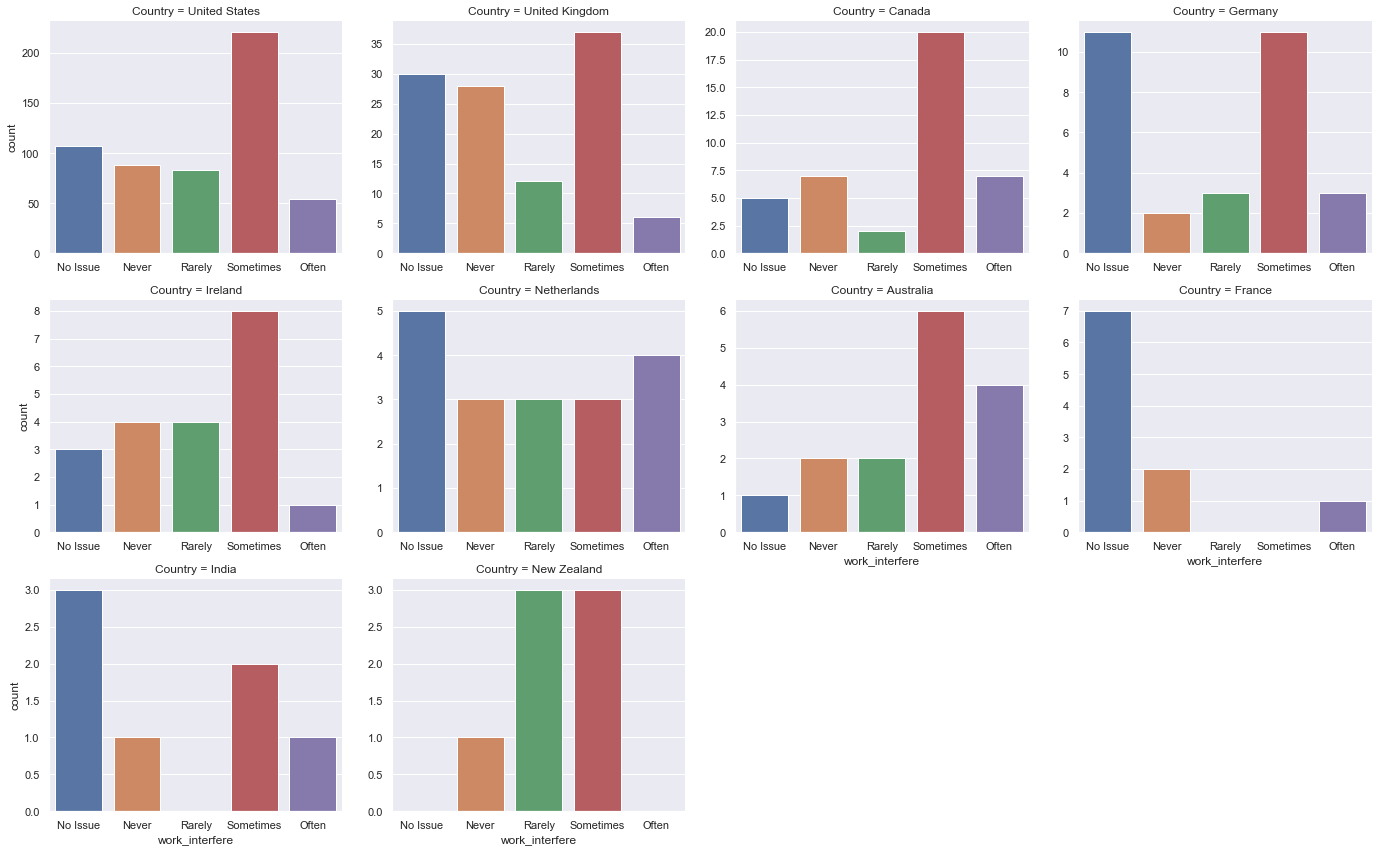

In [21]:
# Create a list of the 10 countries with most respondents
countries = data.Country.value_counts()[:10].index.tolist()

# Slice the data to include only the 10 countries with most respondents, tech, and employees only.
dfplot = data[data.Country.isin(countries)][data.tech_company == 'Yes'][data.self_employed == 'No']

g=sns.catplot(col='Country', x='work_interfere', kind='count', data=dfplot, col_wrap=4, sharey=False,
             sharex=False, height=4, aspect=1.2, col_order=countries, 
              order=['No Issue','Never','Rarely','Sometimes','Often'])

plt.show()

**Takeaway:** Dutch, French and Indian respondents seem to be the most mentally healthy at work. However, the data from these countries is too small not to rule out high standard errors. For the purposes of this analysis, let's only keep the data from the 5 most abundant countries.

### 2.4.2. Visualizing Work Interference by US State

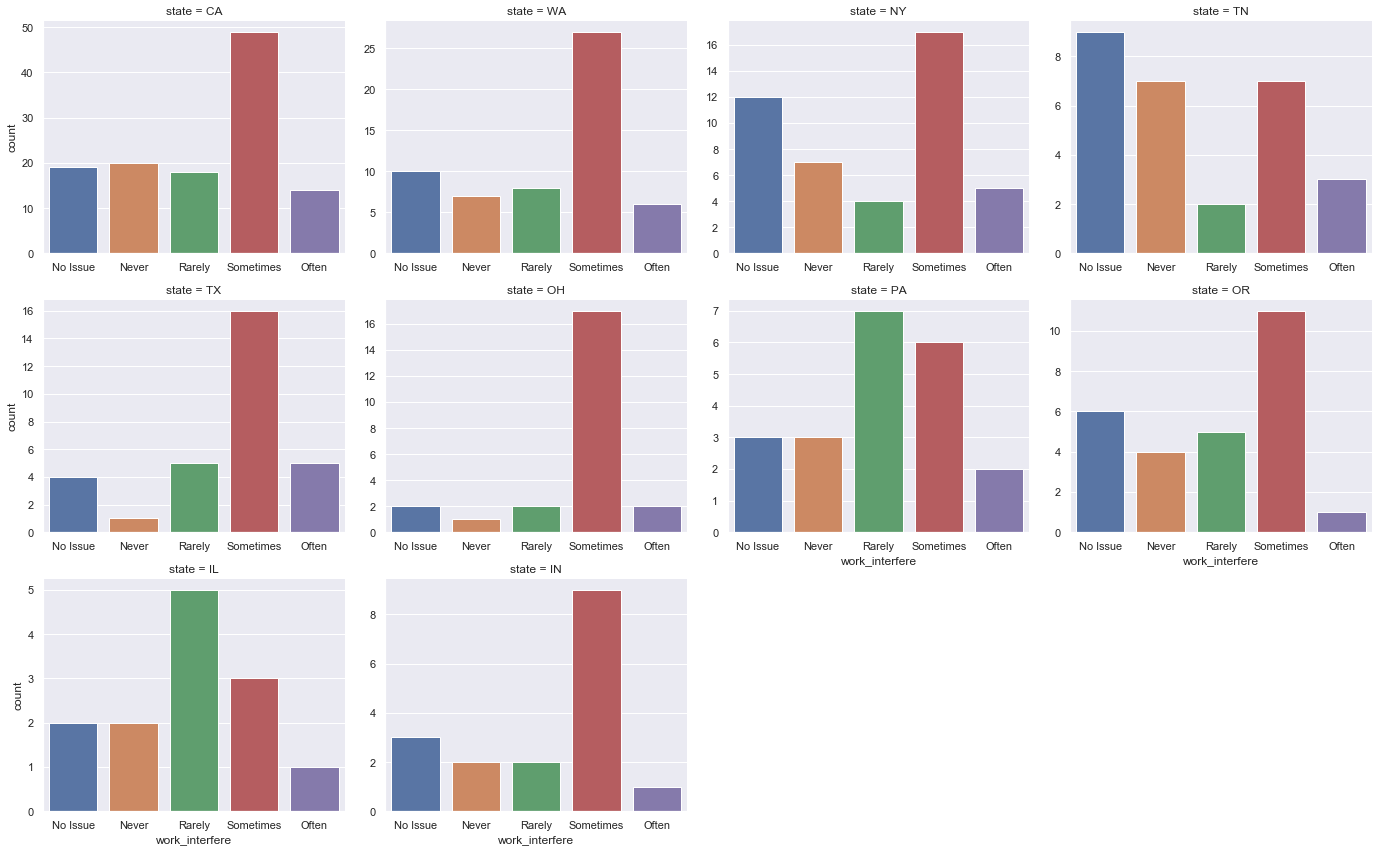

In [22]:
# Slice the data to include only the US, in order to plot by state
states = data.state.value_counts()[:10].index.tolist()

# Slice the data to include only the 10 states with most respondents, tech, and employees only.
dfplot = data[data.state.isin(states)][data.tech_company == 'Yes'][data.self_employed == 'No']

g=sns.catplot(col='state', x='work_interfere', kind='count', data=dfplot, col_wrap=4, sharey=False,
             sharex=False, height=4, aspect=1.2, col_order=states, 
              order=['No Issue','Never','Rarely','Sometimes','Often'])

plt.show()

**Takeaway:** New York respondents seem too disproportionatelly with 'No-Issue', compared to California and Washington. There's also less data from here so it's not very relevant.

## 2.5. Influence of Time in Work Interference

[Back to Ouline](#Outline)

There's a possibility that seasonal changes had an impact on people's work interference by mental health. Winter's lack of sunlight is known for causing seasonal affective disorder (SAD). Let's investigate if this is plausible in this data.

In [23]:
# Timestamps are currently formatted as strings. Convert them to pandas' time data.
data.Timestamp = pd.to_datetime(data.Timestamp)

In [24]:
# Statistical summary of time series
data.Timestamp.describe()

count                    1259
unique                   1246
top       2014-08-27 14:22:43
freq                        2
first     2014-08-27 11:29:31
last      2016-02-01 23:04:31
Name: Timestamp, dtype: object

### 2.5.1. Visualize the Distribution of Date/Time for all responses

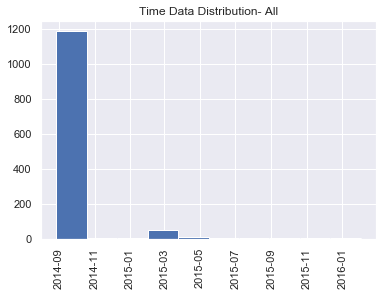

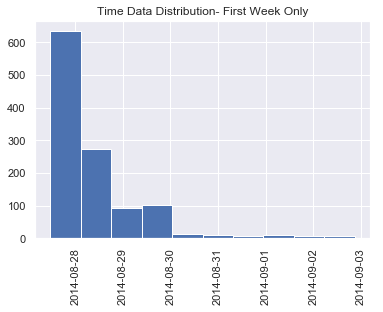

In [25]:
# Let's put the dates in order
dfplot = data.sort_values(by='Timestamp')

# View the time distribution of raw data
dfplot.Timestamp.hist()
plt.title('Time Data Distribution- All')
plt.xticks(rotation=90)
plt.show()

# Slice a portion of the time series
dfplot = dfplot[dfplot.Timestamp < '2014-09-03']

# View the distribution of the slice
dfplot.Timestamp.hist()
plt.title('Time Data Distribution- First Week Only')
plt.xticks(rotation=90)
plt.show()

**Takeaway:** About 90% of the data was collected during the first week of the survey. This means we can rule out the possibility of seasonal affective disorders influencing people's self-evaluations.

## 2.6. Influence of Support in Work Interference

[Back to Ouline](#Outline)

So far we've only analyzed the demographic variables. This allows us to understand who is most affected by mental issues at work. But we haven't explored the implications that specific actions, attitudes, or services have upon that outcome. This part of the analysis should help us identify methods of coping with mental issues at work.


BENEFITS
Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64


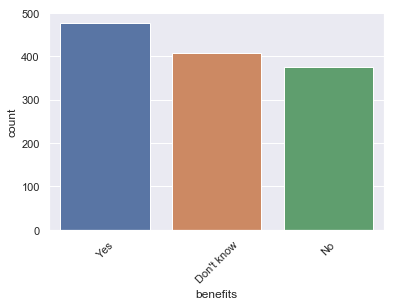


CARE_OPTIONS
No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64


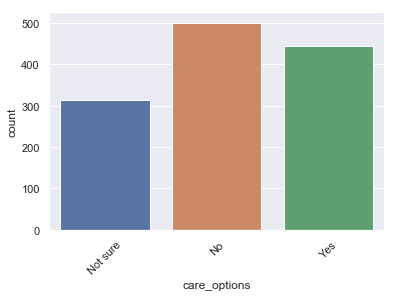


WELLNESS_PROGRAM
No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64


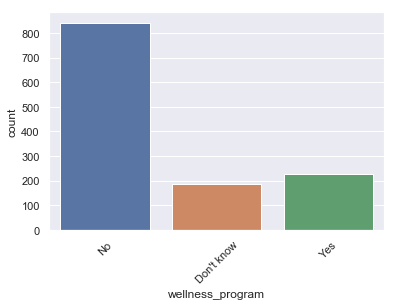


SEEK_HELP
No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64


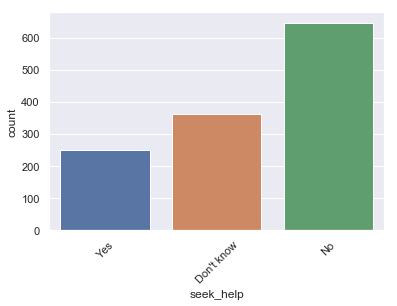


ANONYMITY
Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64


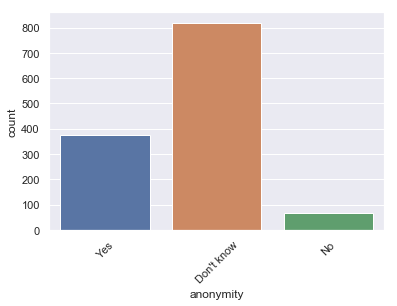


LEAVE
Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64


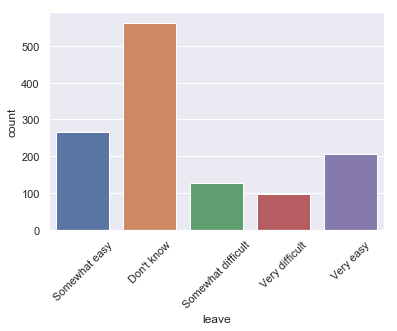

In [26]:
# Let's see the categories of each variable related to mental health services
categorical = data.loc[:,'benefits':'leave'].select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print('\n'+ i.upper())
    print(column.value_counts())
    sns.countplot(data=categorical, x=column)
    plt.xticks(rotation=45)
    plt.show()

To clarify what these variables stand for:
* **Benefits:** Does your employer provide mental health benefits as part of healthcare coverage?
* **Options:** Do you know the options for mental health care available under your employer-provided coverage?
* **Wellness-Program:** Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
* **Seek-Help:** Does your employer offer resources to learn more about mental health concerns and options for seeking help?
* **Anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
* **Leave:** If a mental health issue prompted you to request a medical leave from work, asking for that leave would be...

### 2.6.1 Correlations with Work Interference:
For the purposes of this research proposal, we must isolate one variable to test on a treatment group. However, all of these variables could have some influence over a respondent's self-assessed 'work_interfere' answer. So let's determine which variable explains the most variance in 'work_interfere'. This way we can be sure our experiment will have the most impact.

We'll also add the variable 'family_history' to the correlation matrix, which indicates if the respondent had a family history of mental health issues.


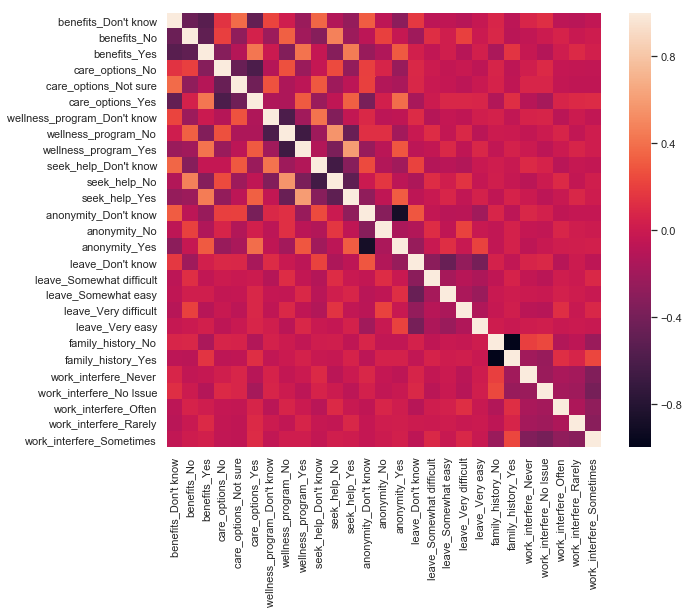

In [27]:
# Define a subset of data including mental-care variables, plus 'work_interfere'
# and 'family_history'.

health = pd.concat([data.loc[:,'benefits':'leave'],data[['family_history','work_interfere']]],axis=1)

# Plot a correlation matrix, using dummies.
plt.figure(figsize=(10,8))
sns.heatmap(pd.get_dummies(health).corr(),square=True)
plt.show()

**Takeaway:** The feature 'work_interfere_often' has its strongest correlation with the feature 'family_history_Yes' and 'leave_Very difficult'. This means that the people who had a family history of mental health where more likely to be 'Often' affected at work if they felt it was 'Very difficult' to take leave days.

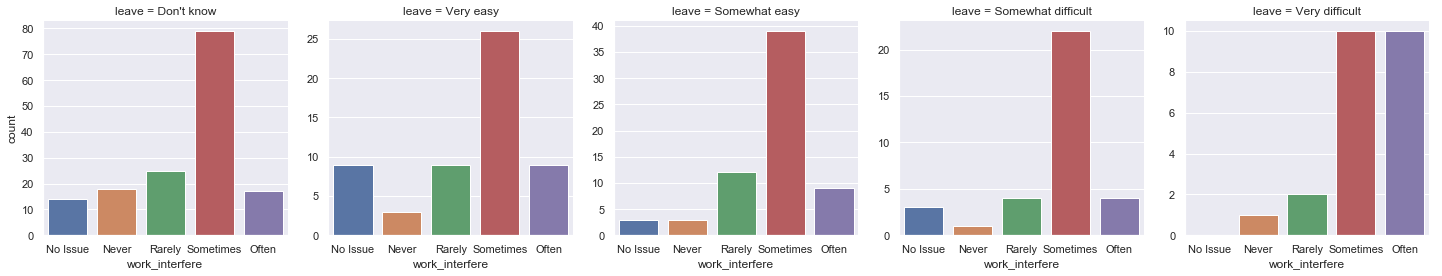

In [28]:
# Let's focus on the people with a family history of mental health.
subset = data[data.family_history=='Yes'][data.tech_company=='Yes'][data.self_employed=='No']

# let's look at the distributions of 'work_interfere', by 'leave' on the subset.
colorder = ["Don't know","Very easy","Somewhat easy","Somewhat difficult","Very difficult"]
xorder = ['No Issue','Never','Rarely','Sometimes','Often']
sns.catplot(data=subset, col='leave', x='work_interfere', kind='count',height=4,
           aspect=1, order=xorder, col_order=colorder, sharey=False)

plt.show()

**Takeaway:** The largest 'Often' is found at the far right, where people said it was 'Very difficult' to leave. This plot strongly supports the argument that people with a family history of mental health are more likely to be affected at work if they lack the flexibility to take days off when needed.

# 3. Experimental Design 

[Back to Ouline](#Outline)

## 3.1. Problem
Mental health issues are an obstacle to productivity. Some people are affected more strongly than others. People with a family history of mental health issues are particularly vulnerable to severe work interference.

## 3.2. Solution
Some work conditions could mitigate work interference in vulnerable groups. Strict leave policies were highly correlated with the most work interference ('Often') for the respondents of this dataset. Therefore the reverse could lead to a reduction in severe work interference in those with a family history of mental health issues.

## 3.3. Hypothesis
Less tech employees with a family history of mental issues would suffer severe work interference if they had access to flexible leave policies. In experimental terms, if a more flexible leave policy were in place, vulnerable and affected individuals would show at least a 30% increase in productivity.

## 3.4. Sample Selection
Identify tech employees who have a family history of mental issues and said they are 'Often' affected at work by mental issues. From this subset, two groups of 50 people will be chosen randomly. One will be our control group, one will be our treatment group. 

## 3.5. Treatment
The treatment group will be offered a leave policy with improvements in flexibility as part of an official human resources campaign. The other will continue working as usual. 

# 4. Rollout and Evaluation

[Back to Ouline](#Outline)

## 4.1. Rollout Plan

The new leave policy will be communicated to the treatment group by a mental health counselor who will also perform a mental health screening. For a period of 5 weeks, the treatment will be applied to one member of the treatment group per day. Assumming 5 people per week receive the treatment, by the end of the fifth week 50% of the treatment group (25 total) will receive the treatment. Data will be collected for the coming 6 months after rollout began. Based on said data, the rollout could continue to the remainder 50%. 

Rollout should begin at a time of year devoid of major holidays in the coming six months. This would make March the most ideal month to start the experiment. This will avoid halloween, new years eve and valentine's day.

Six months after rollout began, the data collected will be used to determine the next step. If at that point weekly supervisor evaluations showed productivity levels 30% below those on the first week of the experiment, the rollout would come to a halt. Otherwise, rollout is to resume treatment to the remaining 50% of the group. Six months should be enough time to even out any temporal down fluctuations.

## 4.2. Evaluation Plan

[Back to Ouline](#Outline)

Assessment would be made 1 year after the new leave policy was successfully communicated to all the members of the treatment group. This will avoid potential bias from seasonal factors. 

### 4.2.1 Metrics 

**Primary Metric:** 
* **Productivity, as assessed by a supervisor.** This will avoid bias from self-assessments.

**Side-note:** The primary driver that led to this hypothesis was the self-assessed 'work_interfere' variable from the survey. From a management perspective however, this variable has a tangible quality. Productivity on the other hand, is a measurable, continuous variable that also holds vital interest for business.

**Secondary Metrics:** 
* **Work interference, self-evalution.** It could be insightful to compare data from supervisors vs data from self-assesments. Assessed at rollout start and one year afterwards.
* **Mental health score** assessed by mental health specialist. This gives us a 3rd perspective by which to judge the results. Assessed at rollout start and one year afterwards.
* **Count of leave days taken.** Assessed daily for the duration of the experiment. We'll be able to identify if this treatment altered the regular rate of leave days taken. It'll also allow for controlling the rollout. 

### 4.2.2. Success Criteria
At the end of the experiment the productivity levels of the treatment group will be compared with the control group. Our hypothesis is that the treatment group will have a mean productivity level 30% higher than the control group. A t-test will be performed to the mean productivity level of the treatment group VS that of the control group.  

### 4.2.3. If P < 0.075:
Assume the differece to be significant and thus we'll believe our results.

* In this scenario, if the treatment group shows a productivity level 25% or higher, and leave days increased at least 5%, we conclude the experiment was successful. If leave days didn't increase more than 5%, assume something about the experiment wasn't conducted adequately.

* If it is in between 10 and 25% higher, analyze the secondary metrics. If mental score and self assessment both improved 15% or more, also conclude the experiment to be successful. 

* Productivity less than 10% higher: If mental score and self-assessment both improved 15% or more, conclude that there is an external factor affecting productivity. Else, if mental score and self-assessment were less than 15% higher, assume the null hypothesis to be true. The variable 'leave' had a weaker correlation than we estimated. Repeat the experiment using a different variable as treatment.

* Productivity lower than the control group: If mental score increased 10% or more, treatment improved mental health, but a lurking variable is impeding productivity. If mental score isn't more than 5% points different from control group, conclude that 'leave' has no impact on productivity and therefore the null hypothesis is true.

### 4.2.4. If P > 0.075:
* Consider any difference between the groups to be likely the result of chance.
* Repeat the experiment selecting two different groups and improve the execution.